In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
dataset = pd.read_csv('full_data.csv')
dataset.head(10)

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   
5    Male  74.0             1              1          Yes        Private   
6  Female  69.0             0              0           No        Private   
7  Female  78.0             0              0          Yes        Private   
8  Female  81.0             1              0          Yes        Private   
9  Female  61.0             0              1          Yes       Govt_job   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1  
5          Rural              70.09  27.4     never smoked       1  
6          Urban              94.39  22.8     never smoked       1  
7          Urban              58.57  24.2          Unknown       1  
8          Rural              80.43  29.7     never smoked       1  
9          Rural             120.46  36.8           smokes       1

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
dataset.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000

In [5]:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
dataset = dataset.drop(["ever_married", "work_type", "Residence_type"], axis =1)
dataset.head()

gender   age  hypertension  heart_disease  avg_glucose_level   bmi  \
0    Male  67.0             0              1             228.69  36.6   
1    Male  80.0             0              1             105.92  32.5   
2  Female  49.0             0              0             171.23  34.4   
3  Female  79.0             1              0             174.12  24.0   
4    Male  81.0             0              0             186.21  29.0   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2           smokes       1  
3     never smoked       1  
4  formerly smoked       1

In [7]:
dataset.groupby(['gender','stroke'])['stroke'].count()
dataset.groupby(['gender','age'])['age'].count()

gender  age  
Female  0.08      1
        0.32      3
        0.40      1
        0.48      2
        0.56      1
                 ..
Male    78.00    42
        79.00    26
        80.00    28
        81.00    22
        82.00    23
Name: age, Length: 205, dtype: int64

In [8]:
def bar_plot(variable):
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [9]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['gender', 'smoking_status']


In [10]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

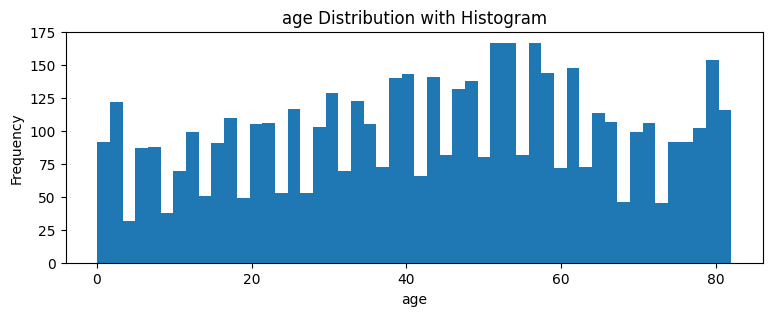

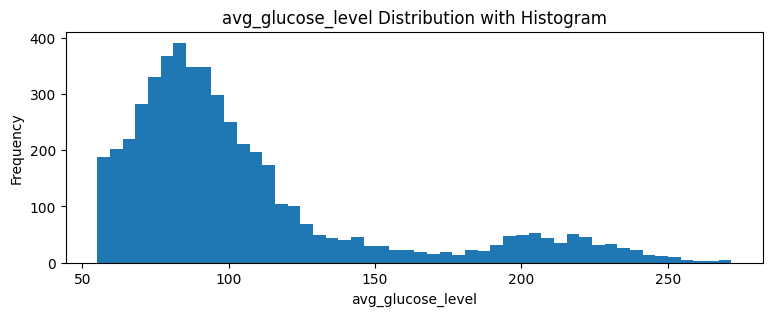

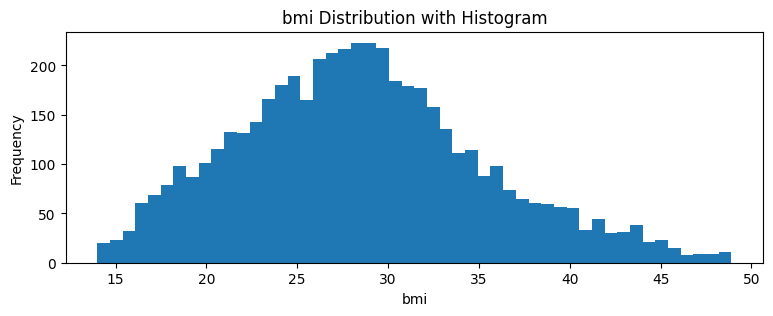

In [11]:
numerical_variables = ['age', 'avg_glucose_level', 'bmi']
for n in numerical_variables:
    plot_hist(n)

Text(0.5, 1.0, 'Stroke Interval and Counts')

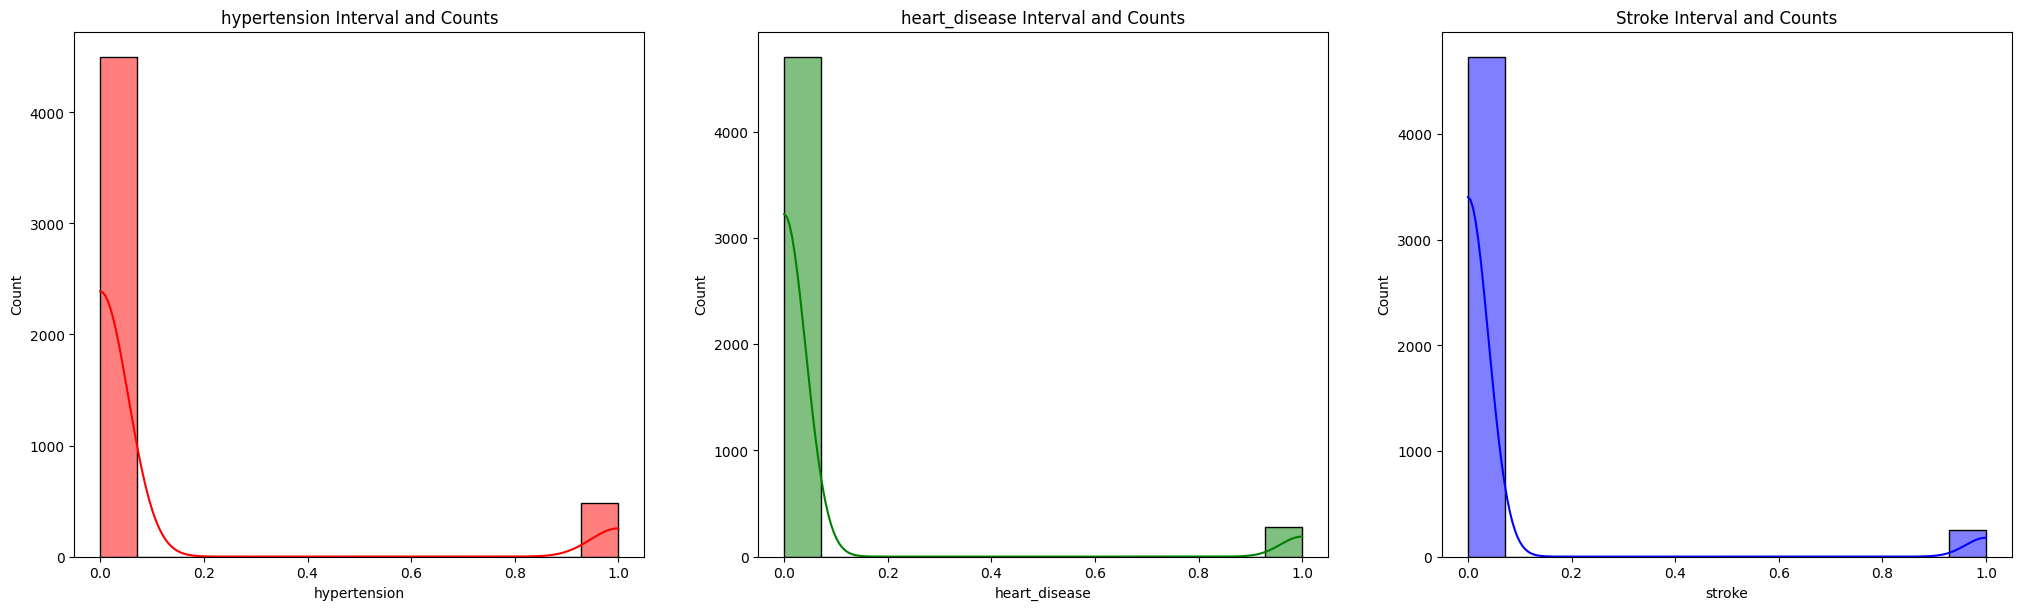

In [12]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(dataset['hypertension'], color = 'red', kde = True).set_title('hypertension Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(dataset['heart_disease'], color = 'green', kde = True).set_title('heart_disease Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(dataset['stroke'], kde = True, color = 'blue').set_title('Stroke Interval and Counts')

In [13]:
dataset[["gender","stroke"]].groupby(["gender"], as_index = False).mean().sort_values(by="stroke",ascending = False)

gender    stroke
1    Male  0.052073
0  Female  0.048160

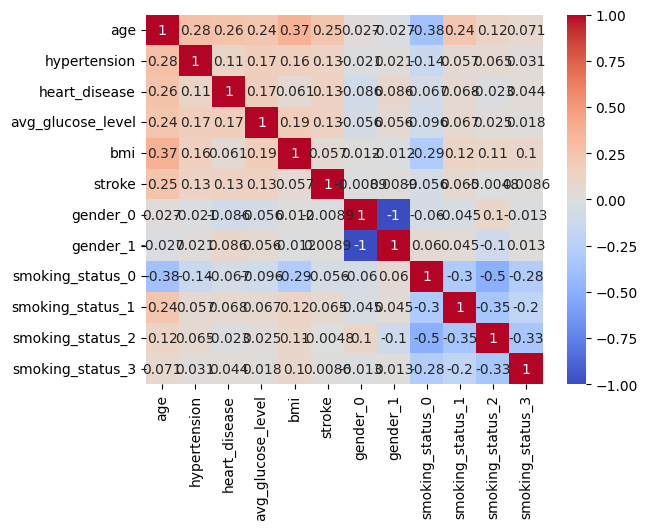

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Assuming 'dataset' is your DataFrame
encoder = OneHotEncoder()
encoded_gender = encoder.fit_transform(dataset[['gender']])
encoded_gender_df = pd.DataFrame(encoded_gender.toarray(), columns=['gender_0', 'gender_1'])
dataset = pd.concat([dataset, encoded_gender_df], axis=1)
dataset.drop(['gender'], axis=1, inplace=True)

encoded_smoking_status = encoder.fit_transform(dataset[['smoking_status']])
encoded_smoking_status_df = pd.DataFrame(encoded_smoking_status.toarray(), columns=['smoking_status_0', 'smoking_status_1', 'smoking_status_2', 'smoking_status_3'])

dataset = pd.concat([dataset, encoded_smoking_status_df], axis=1)
dataset.drop(['smoking_status'], axis=1, inplace=True)

correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


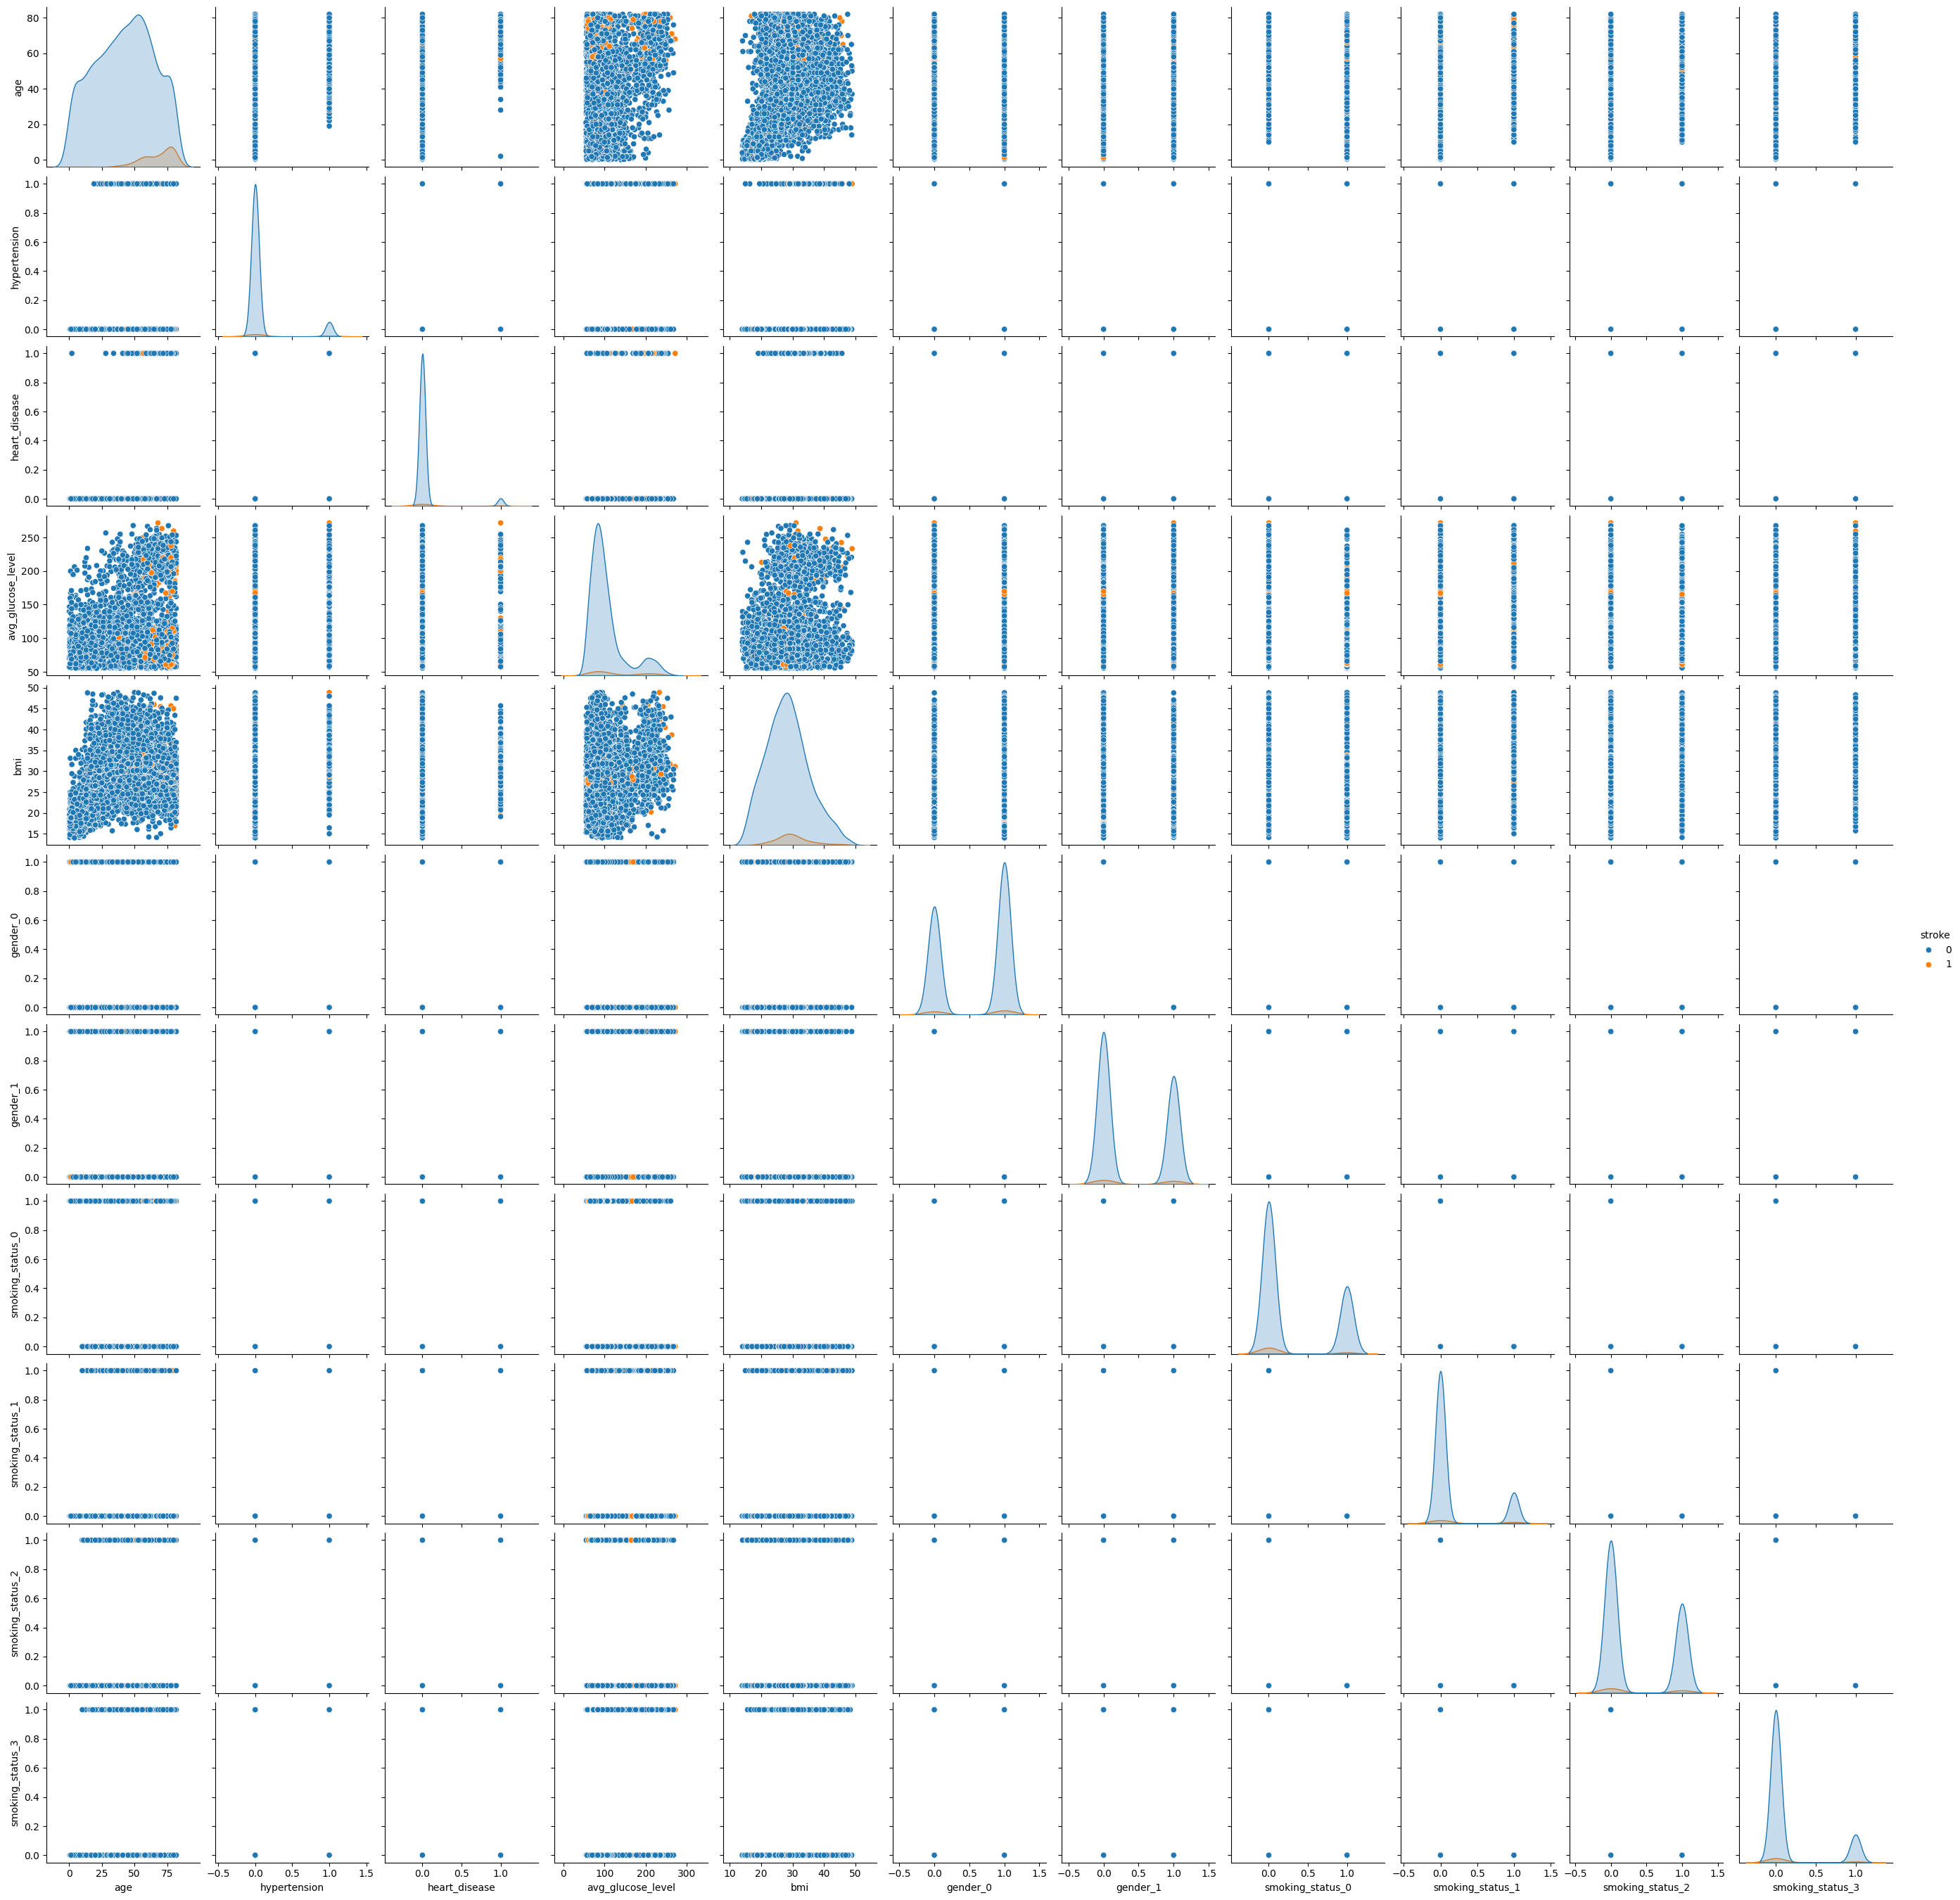

In [15]:
sns.pairplot(dataset, hue = 'stroke')

In [15]:
X = dataset.drop(['stroke'], axis = 1)
y = dataset['stroke']
print(X)

       age  hypertension  heart_disease  avg_glucose_level   bmi  gender_0  \
0     67.0             0              1             228.69  36.6       0.0   
1     80.0             0              1             105.92  32.5       0.0   
2     49.0             0              0             171.23  34.4       1.0   
3     79.0             1              0             174.12  24.0       1.0   
4     81.0             0              0             186.21  29.0       0.0   
...    ...           ...            ...                ...   ...       ...   
4976  41.0             0              0              70.15  29.8       0.0   
4977  40.0             0              0             191.15  31.1       0.0   
4978  45.0             1              0              95.02  31.8       1.0   
4979  40.0             0              0              83.94  30.0       0.0   
4980  80.0             1              0              83.75  29.1       1.0   

      gender_1  smoking_status_0  smoking_status_1  smoking_sta

In [16]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)
X_train.shape, X_test.shape

((3984, 11), (997, 11))

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9157472417251755


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       943
           1       0.23      0.24      0.24        54

    accuracy                           0.92       997
   macro avg       0.59      0.60      0.60       997
weighted avg       0.92      0.92      0.92       997



In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import joblib
#saving the model**********************************************************************
model_path = os.path.join('C:\\Users\\mani\\OneDrive\\Desktop\\Mini Project','models\\strookenew.pkl')
#C:\\Users\\msn21\\Desktop\\Major Project\\Stroke
#model_path=os.path.join('D:/Python37/Projects/Stroke Prediction/','models/dt.sav')
joblib.dump(DecisionTreeClassifier,model_path)    
print("Saved knn_model")

In [21]:
import time
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
end_time = time.time()
rf_time_taken = end_time - start_time
print("Random Forest Training Time:", rf_time_taken)

# Training a single decision tree model and measuring the time taken
start_time = time.time()
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
end_time = time.time()
dt_time_taken = end_time - start_time
print("Decision Tree Training Time:", dt_time_taken)

Random Forest Training Time: 1.2585093975067139
Decision Tree Training Time: 0.03560304641723633


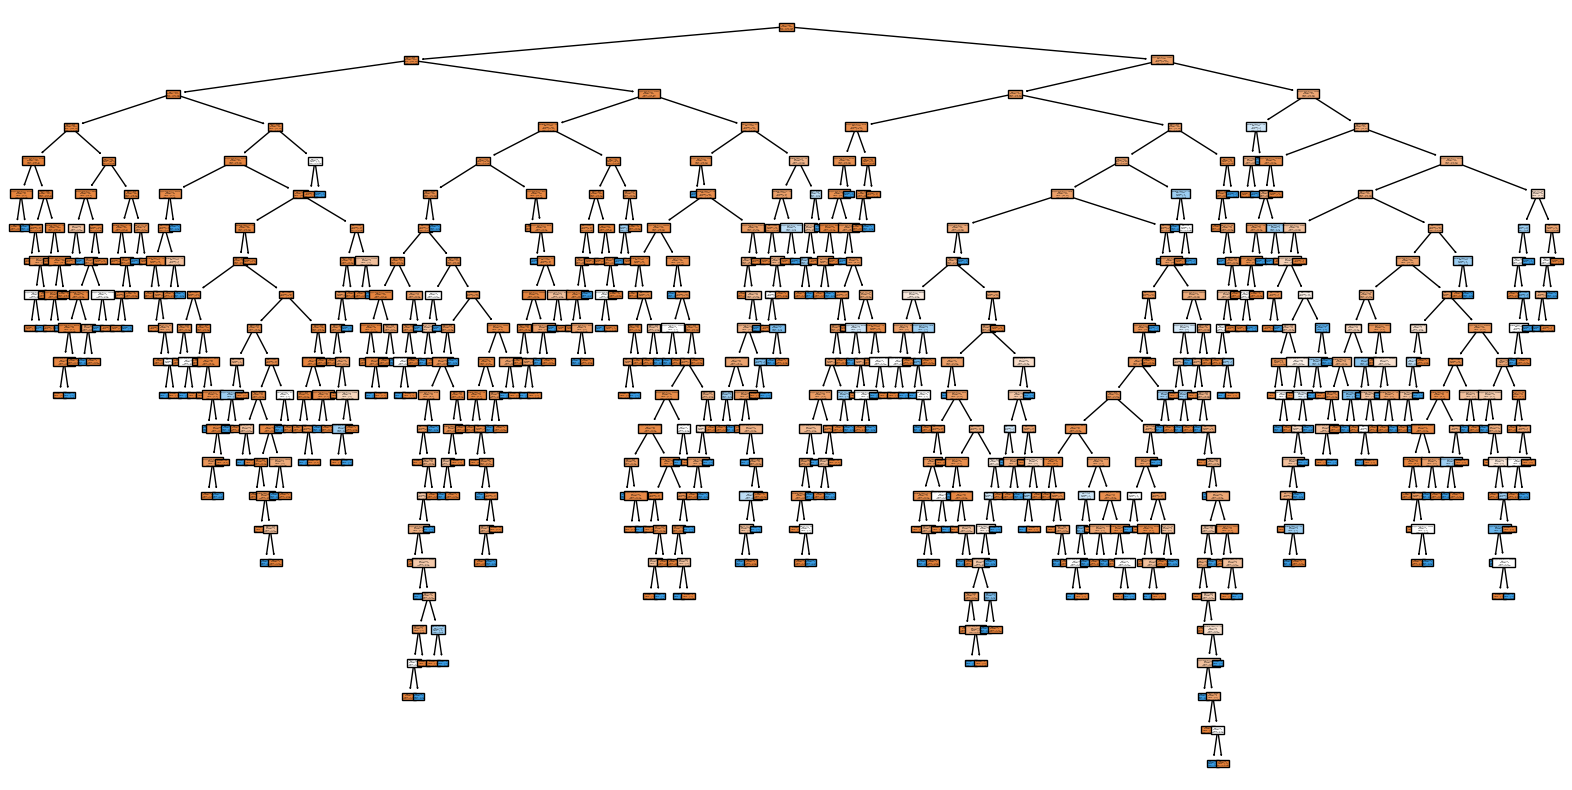

<Figure size 640x480 with 0 Axes>

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have loaded your dataset into a pandas DataFrame called 'data'
# X contains the features, y contains the target variable
X = dataset.drop(columns=['stroke'])
y = dataset['stroke']

# Create a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No Stroke', 'Stroke'], filled=True)
plt.show()
plt.savefig('decision_tree.png', dpi=300)


In [23]:
# Assuming 'clf' is your trained DecisionTreeClassifier model
root_feature = clf.tree_.feature[0]
root_threshold = clf.tree_.threshold[0]

print(f"Root node: Feature {root_feature} (threshold: {root_threshold})")


Root node: Feature 0 (threshold: 67.5)


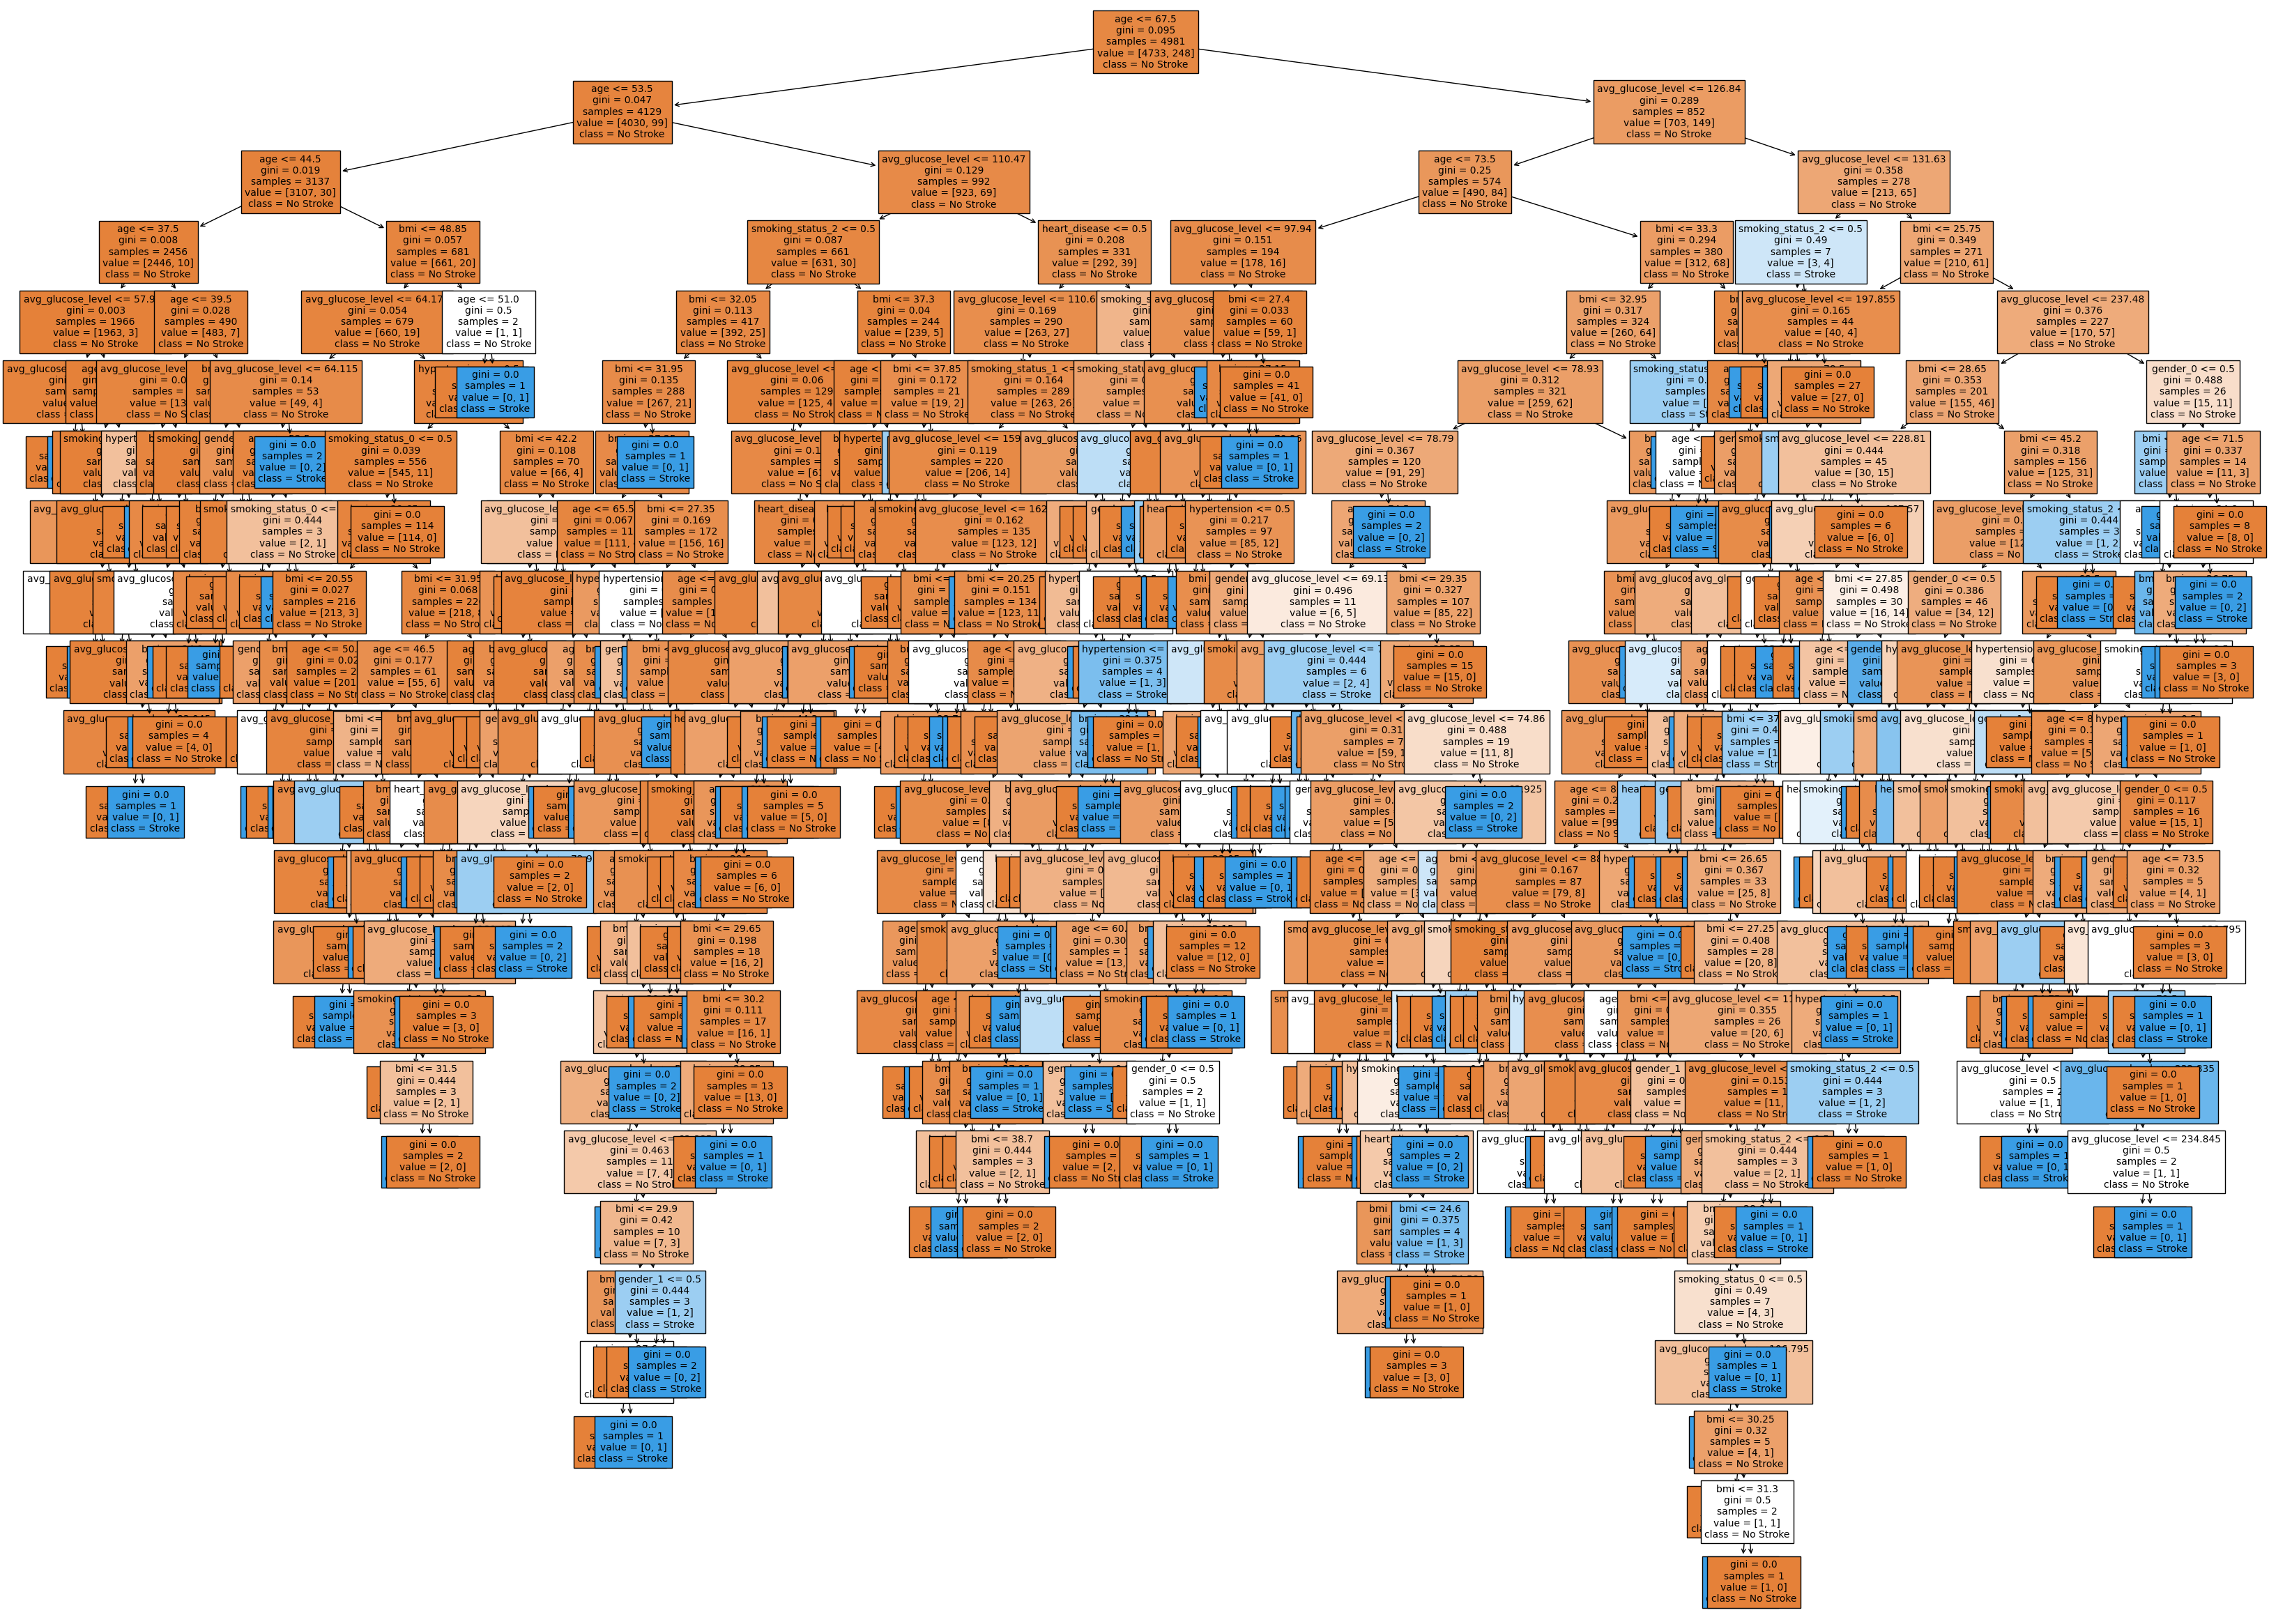

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 30))  # Set the figure size
plot_tree(clf, feature_names=X.columns, class_names=['No Stroke', 'Stroke'], filled=True, fontsize=10)
plt.savefig('decision_tree.png', bbox_inches='tight')  # Save the figure with tight bounding box
plt.show()
